# Analyzing Cars Dataset and clustering based on their fuel average

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px

In [2]:
sns.set_theme(color_codes=True)
sns.set_style('whitegrid')
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('cluster-mpg.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df['name'].nunique()

301

In [8]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [9]:
df_w_dummies = pd.get_dummies(df.drop('name',axis=1))

In [10]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaled_X = scaler.fit_transform(df_w_dummies)

In [14]:
scaled_X

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [15]:
scaled_df = pd.DataFrame(scaled_X,columns=df_w_dummies.columns)

In [16]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<Figure size 2250x1200 with 0 Axes>

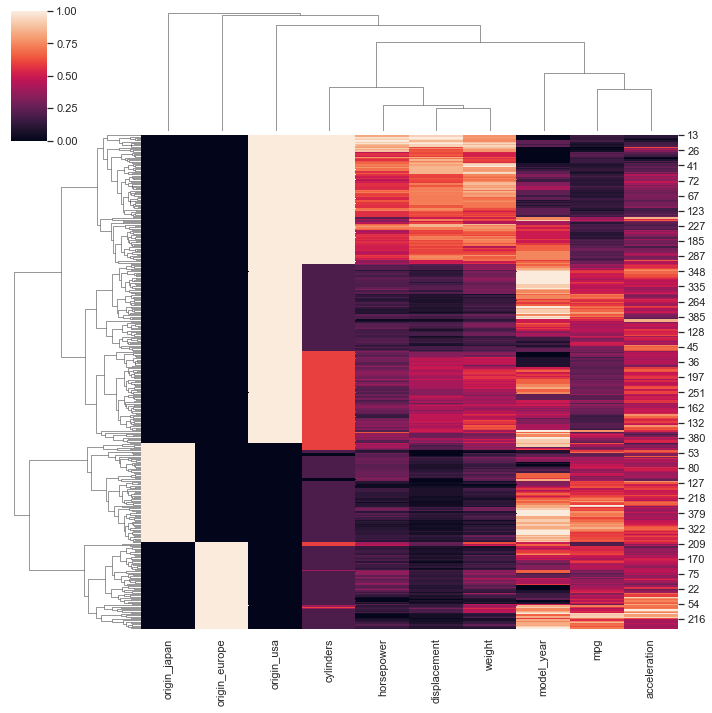

In [17]:
plt.figure(figsize=(15,8),dpi=150)
sns.clustermap(scaled_df)

<AxesSubplot:>

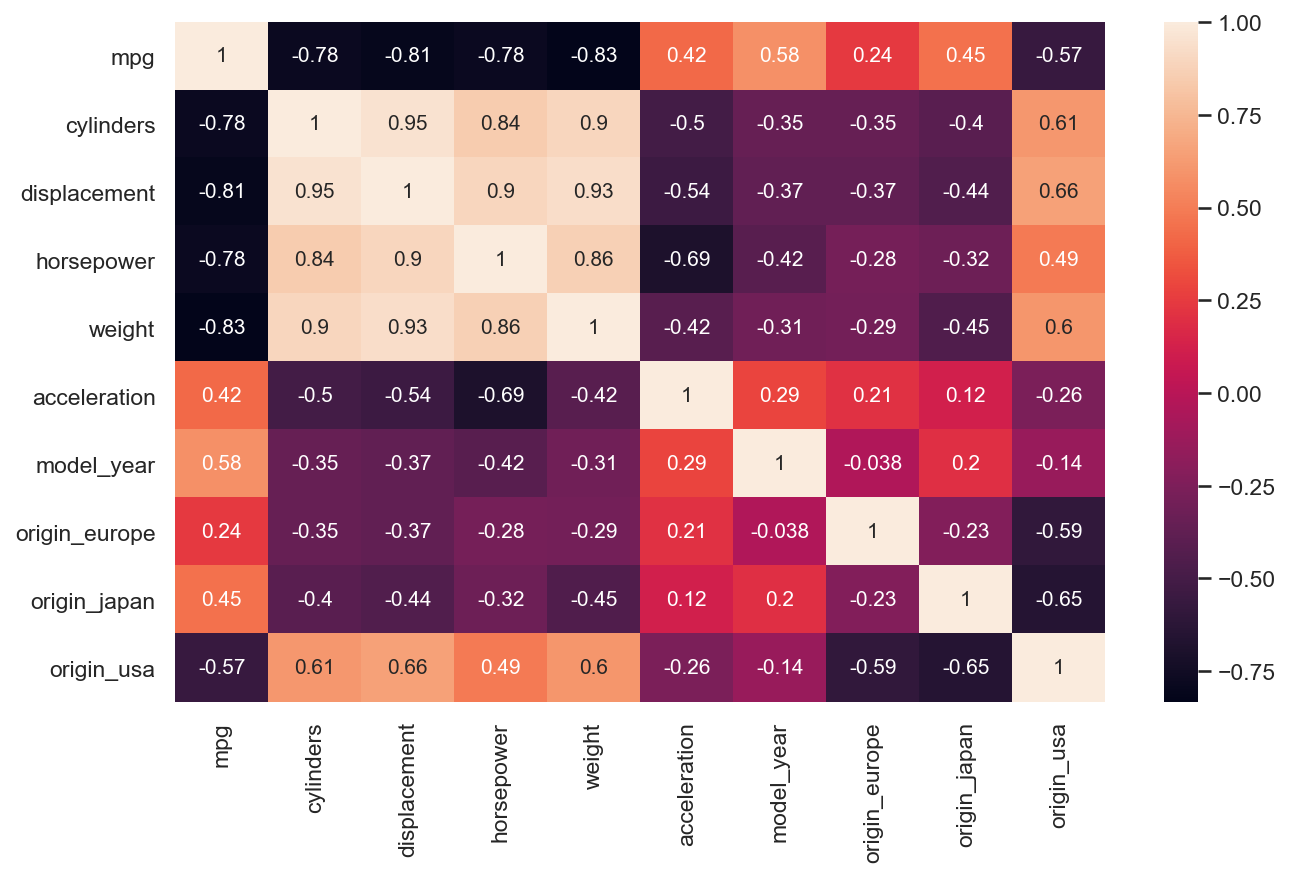

In [18]:
plt.figure(figsize=(10,6),dpi=150)
sns.heatmap(scaled_df.corr(),annot=True)

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
HCmodel = AgglomerativeClustering(n_clusters=4)

In [21]:
cluster_labels = HCmodel.fit_predict(scaled_X)

In [22]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

In [23]:
fig = px.scatter(df, x = 'mpg' , y = 'weight', color=cluster_labels)
fig.show()

In [24]:
fig = px.scatter(df, x = 'mpg' , y = 'horsepower', color=cluster_labels)
fig.show()

In [25]:
#help(AgglomerativeClustering)

In [26]:
#max distance possible?
#sqrt(n_features)

In [27]:
len(scaled_df.columns)

10

In [28]:
np.sqrt(10) #max distance possible bw two points(minmax scaling)

3.1622776601683795

In [29]:
#Creating cluster wrt fuel average

In [30]:
scaled_df['mpg'].idxmax()

320

In [31]:
scaled_df['mpg'].idxmin()

28

In [32]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

In [33]:
distance = np.linalg.norm(car_a-car_b)
distance

2.3852929970374714

In [34]:
scaled_df['mpg'].max()

1.0000000000000002

In [35]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=3.162)

In [36]:
cluster_labels = model.fit_predict(scaled_X)

In [37]:
cluster_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 1, 1, 4, 2, 2, 2,
       2, 2, 1, 3, 3, 3, 3, 4, 0, 4, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 0, 1, 1, 0, 2, 2, 2, 4, 4, 2, 0, 4, 0, 2, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 2, 2, 2, 0, 4, 4, 0, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 1, 4, 0, 4,
       4, 0, 1, 2, 3, 3, 2, 2, 2, 2, 3, 2, 4, 3, 1, 1, 1, 4, 0, 4, 0, 1,
       1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 4, 4, 0, 2, 2, 4, 4, 2, 1, 1, 1, 1,
       5, 3, 3, 3, 1, 1, 1, 1, 1, 5, 5, 4, 0, 1, 0, 4, 2, 4, 1, 2, 1, 2,
       2, 2, 2, 4, 2, 2, 0, 0, 2, 5, 5, 5, 5, 1, 1, 1, 1, 0, 0, 2, 4, 1,
       1, 1, 1, 2, 4, 4, 0, 2, 5, 2, 4, 2, 5, 5, 5, 5, 4, 0, 2, 0, 4, 5,
       5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 5, 2, 0, 4, 0, 0, 0, 4, 2, 4, 2, 4,
       2, 0, 4, 6, 4, 5, 5, 5, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 5, 1, 5, 5,
       0, 4, 4, 0, 4, 0, 0, 4, 2, 2, 2, 2, 2, 4, 1, 1, 0, 1, 1, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 4, 0, 0, 2, 5, 2, 5, 0, 0,

In [38]:
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [39]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

## Linkage Matrix

In [40]:
Linkage_matrix = hierarchy.linkage(model.children_)

In [41]:
Linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

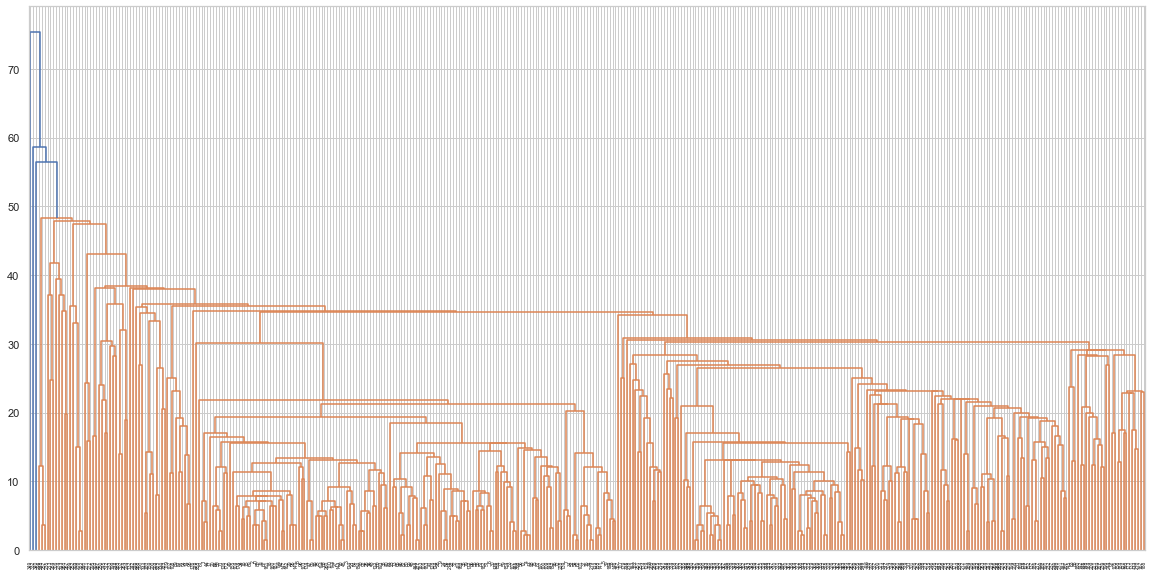

In [42]:
plt.figure(figsize=(20,10))
dendo = dendrogram(Linkage_matrix)

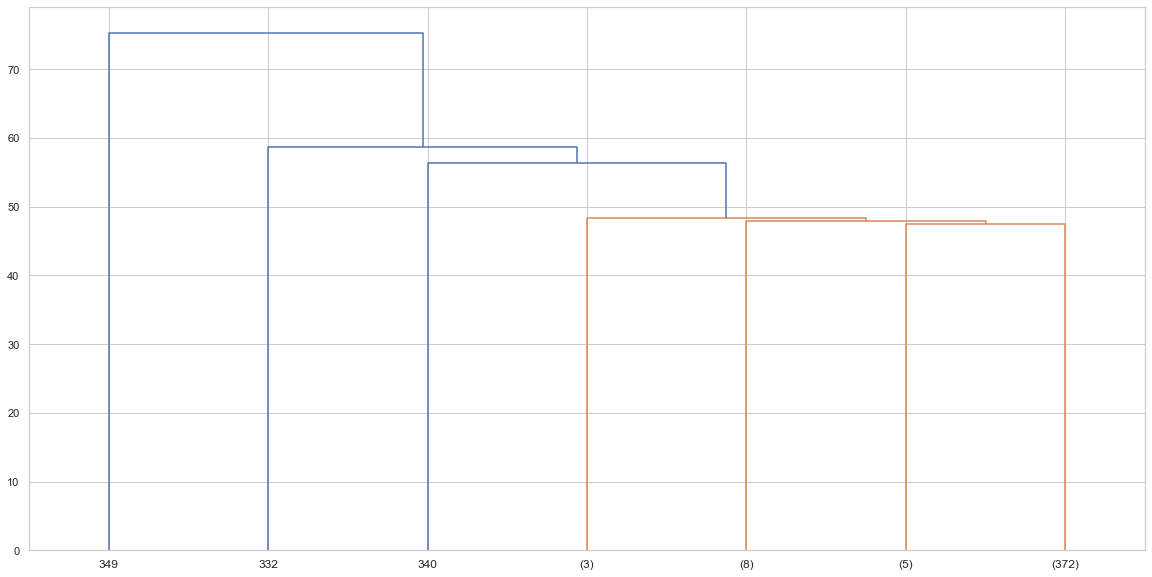

In [43]:
plt.figure(figsize=(20,10))
dendo = dendrogram(Linkage_matrix,truncate_mode='lastp',p=7)

In [44]:
model1 = AgglomerativeClustering(n_clusters=None, distance_threshold=2.385)

In [45]:
cluster_labels1 = model1.fit_predict(scaled_X)

In [46]:
np.unique(cluster_labels1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [47]:
cluster_labels1

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 4, 4, 0, 1, 1, 1,
       1, 1, 4, 3, 3, 3, 3, 0, 7, 0, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3,
       4, 7, 4, 4, 7, 1, 1, 1, 0, 0, 1, 7, 0, 7, 1, 7, 7, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 7, 0, 0, 7, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 1, 3, 3, 3, 3, 4, 0, 7, 0,
       0, 7, 4, 1, 3, 3, 1, 1, 1, 1, 3, 1, 0, 3, 4, 4, 4, 0, 7, 0, 7, 4,
       4, 4, 3, 3, 3, 3, 3, 1, 1, 1, 0, 0, 7, 1, 1, 0, 0, 1, 4, 4, 4, 4,
       5, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 0, 7, 4, 7, 0, 1, 0, 4, 1, 4, 1,
       1, 1, 1, 0, 1, 1, 7, 7, 1, 5, 5, 5, 5, 4, 4, 4, 4, 7, 7, 1, 0, 9,
       4, 9, 4, 1, 0, 0, 7, 1, 5, 8, 0, 1, 5, 5, 5, 5, 0, 2, 8, 7, 0, 5,
       5, 5, 5, 9, 9, 9, 9, 5, 5, 5, 5, 1, 7, 0, 7, 2, 2, 0, 1, 0, 1, 0,
       8, 2, 0, 6, 0, 5, 5, 5, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 5, 9, 5, 5,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 8, 0, 9, 9, 2, 9, 9, 5, 5, 5,
       5, 5, 5, 5, 5, 8, 0, 2, 2, 8, 5, 8, 5, 2, 2,

In [48]:
Linkage_matrix1 = hierarchy.linkage(model1.children_)

In [49]:
Linkage_matrix1

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

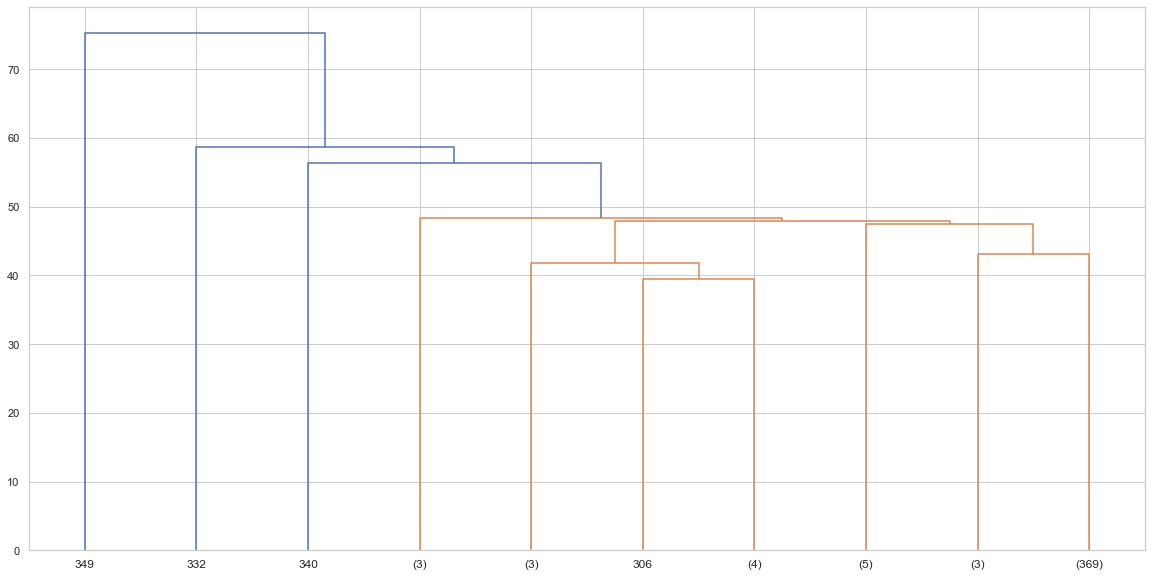

In [50]:
plt.figure(figsize=(20,10))
dendo1 = dendrogram(Linkage_matrix1, truncate_mode='lastp' , p = 10)

In [51]:
from sklearn.cluster import KMeans

In [52]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_) #SSD point -->cluster center

In [53]:
ssd

[202.89045677107225,
 128.60038501802975,
 70.71583505604721,
 56.45199266918159,
 50.18367465102671,
 44.44720206948119,
 39.2949201662633,
 34.49527790227825]

In [54]:
pd.Series(ssd).diff()

0          NaN
1   -74.290072
2   -57.884550
3   -14.263842
4    -6.268318
5    -5.736473
6    -5.152282
7    -4.799642
dtype: float64

In [55]:
fig = px.scatter(x=range(2,10),y=ssd,height=500, labels={"x": "K Value",  "y": "Sum of Square Distances"}).update_traces(mode='lines+markers')
fig.show()

In [56]:
# KEEP IN MIND THAT IN KMEANS , WE ARE DEALING WITH ALL FEATURES

In [57]:
# HC PROVIDES THE ABILITY TO FORM CLUSTERS IN REGARDS TO A CERTAIN FEATURE